# 🔺 Polynomial Regression for Modeling Non-Linear Relationships

Polynomial regression is an **extension of linear regression** that allows modeling of **non-linear relationships** by introducing **higher-order terms** of the input features.

---

## ❓ What is Polynomial Regression?

In **linear regression**, the model assumes a linear relationship between **x** and **y**:  
\[
y = \beta_0 + \beta_1 x + \epsilon
\]  

In **polynomial regression**, we include **higher-degree terms** of **x**:  
\[
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_n x^n + \epsilon
\]  

Where:  
- **β₀, β₁, …, βₙ** – Coefficients of the polynomial terms.  
- **xⁿ** – Higher-order terms that allow capturing non-linear patterns.  
- **ϵ** – Error term representing the difference between predicted and observed values.

---

## 🧩 Why Use Polynomial Regression?
- Captures **non-linear trends** in data while still using a linear model framework.  
- Useful when relationships are **curved**, e.g., quadratic or cubic growth.  
- Can improve **model accuracy** when simple linear regression underfits.  

📌 **Note:** Higher-degree polynomials can lead to **overfitting**, so choose **n** carefully.


# 🔺 Polynomial Regression for Modeling Non-Linear Relationships (Steps & Applications)

Polynomial regression extends linear regression to capture **non-linear relationships** by including higher-degree terms of the input features.

---

## 🛠 Steps in Polynomial Regression

### 1️⃣ Feature Transformation
- Transform the original input data into **polynomial features**.  
- Example:  
\[
x \rightarrow [x, x^2, x^3]
\]  
- This allows the linear regression model to fit non-linear patterns.

### 2️⃣ Model Training
- Perform **linear regression** on the transformed polynomial features.  
- The model learns coefficients for each degree term to best fit the data.

### 3️⃣ Evaluation
- Assess the model's ability to **capture non-linear structures** in the data.  
- Common evaluation metrics: **R² Score, Mean Squared Error (MSE), Mean Absolute Error (MAE)**.

---

## ✅ Advantages
- Effectively **captures non-linear relationships** without changing the linear regression framework.  
- Simple to implement using standard **linear regression algorithms** after feature transformation.

## ⚠️ Limitations
- High-degree polynomials can lead to **overfitting**.  
- May require **regularization** (e.g., Ridge or Lasso) to prevent overfitting.  
- Sensitive to **outliers** in the data.

---

## 🌱 Example Use Case
- **Predicting growth patterns** in biological systems where relationships between variables are **non-linear**, such as enzyme activity vs. substrate concentration or population growth curves.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

X = np.random.rand(100, 1)
y = 3* X **2 + X *2 + np.random.rand(100, 1) * 5

In [5]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [7]:
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

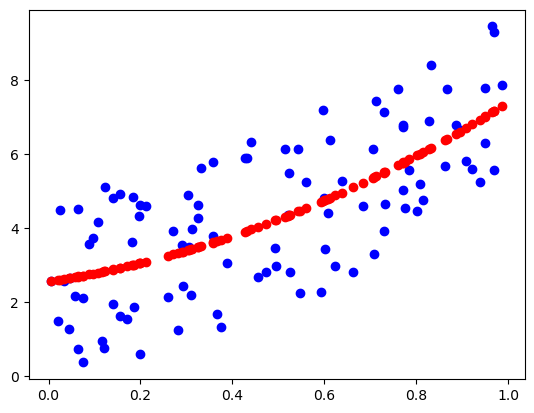

In [8]:
plt.scatter(X, y,color = "blue", label = "Actual Data")
plt.scatter(X, y_pred, color = "red", label = "Predicted Data")
plt.show()

In [9]:
mse = mean_squared_error(y, y_pred)
print(mse)

2.123894864830846


# 🧰 Introduction to Regularization Techniques: Lasso and Ridge Regression

Regularization is a **technique used to prevent overfitting** in regression models by adding a **penalty term** to the cost function.  
It helps control the complexity of the model, ensuring better generalization to unseen data.

---

## ❓ What is Regularization?
- Overfitting occurs when a model fits the training data too closely, failing to generalize.  
- Regularization **discourages overly large coefficients** by adding penalties to the cost function.  

---

## 🔗 Types of Regularization

### 📏 Ridge Regression (**L2 Regularization**)
- **Adds the sum of the squared coefficients** to the cost function.  
\[
J(\beta) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2
\]  
- **λ (lambda)** controls the strength of the penalty.  
- Shrinks coefficients but **does not eliminate them** entirely.  

---

### 🧹 Lasso Regression (**L1 Regularization**)
- **Adds the sum of the absolute coefficients** to the cost function.  
\[
J(\beta) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\beta_j|
\]  
- Encourages **sparsity** in the coefficients, effectively performing **feature selection**.  
- Can shrink some coefficients **all the way to zero**, removing irrelevant features.

---

## ⚖️ Key Differences Between Ridge and Lasso
| Aspect            | Ridge Regression (L2)          | Lasso Regression (L1)            |  
|-------------------|-------------------------------|---------------------------------|  
| **Penalty Term**  | Squares of coefficients        | Absolute values of coefficients |  
| **Effect**        | Shrinks coefficients           | Shrinks and can eliminate some  |  
| **Feature Selection** | ❌ Not performed             | ✅ Performed automatically       |  
| **Use Case**      | When most features are useful  | When only some features matter  |

---

## 📌 Summary
- **Ridge**: Great for multicollinearity, reduces coefficient magnitude without feature elimination.  
- **Lasso**: Useful for sparse solutions and **automatic feature selection**.  
- **Elastic Net**: A hybrid approach combining **L1 and L2 penalties** for more flexibility.  


## 📏 Role of the Regularization Parameter (λ or α)

Regularization **reduces the risk of overfitting** by **controlling the complexity** of the model.  
The **regularization parameter** — denoted as **λ** (or **α** in some libraries like scikit-learn) — plays a **critical role**:

- 🔼 **High λ Value**  
  - Increases the penalty on large coefficients.  
  - Forces **smaller coefficients**, simplifying the model.  
  - **Reduces overfitting**, but may lead to **underfitting** if too large.

- 🔽 **Low λ Value**  
  - Weakens the penalty on coefficients.  
  - Allows the model to **fit the training data more closely**.  
  - Increases the **risk of overfitting**, as the model may become too complex.

📌 **Tip:** Use techniques like **cross-validation** to choose an optimal λ value that balances bias and variance.  


In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 1)
y = 3 * X **2 + X * 2 + np.random.rand(100, 1) * 5

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)

ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

Lasso_model = Lasso(alpha=1)
Lasso_model.fit(X_train, y_train)
Lasso_predictions = Lasso_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Regression MSE: ", ridge_mse)

lasso_mse = mean_squared_error(y_test, Lasso_predictions)
print("Lasso Regression MSE: ", lasso_mse)

Ridge Regression MSE:  2.4183280408125842
Lasso Regression MSE:  4.978387146758442


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing


data = fetch_california_housing(as_frame = True)
df = data.frame


In [19]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [31]:
X = df[['MedInc']]
y = df[['MedHouseVal']]

In [32]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [34]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [35]:
y_pred = model.predict(X_poly)

In [36]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

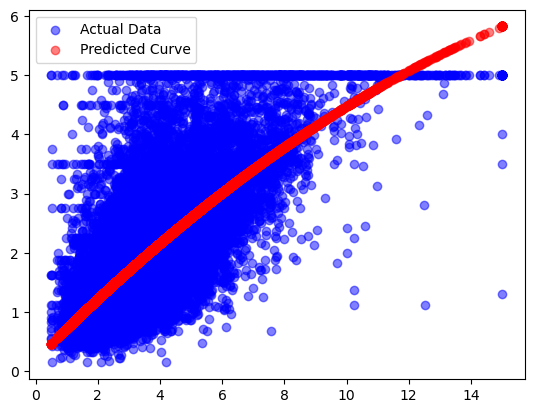

In [39]:
plt.scatter(X, y, color = "blue", label = "Actual Data", alpha=0.5)
plt.scatter(X, y_pred, color="red", label = "Predicted Curve", alpha = 0.5)
plt.legend()
plt.show()

In [41]:
mean_squared_error(y, y_pred)

0.695037253723973

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)

ridge_model = Ridge(alpha = 1)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

Lasso_model = Lasso(alpha=1)
Lasso_model.fit(X_train, y_train)
Lasso_predictions = Lasso_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Regression MSE: ", ridge_mse)

lasso_mse = mean_squared_error(y_test, Lasso_predictions)
print("Lasso Regression MSE: ", lasso_mse)

Ridge Regression MSE:  0.703272792117919
Lasso Regression MSE:  0.8150896447059206
